# Candy Regression

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 

# display all columns of dataframe in notebook 
pd.pandas.set_option('display.max_columns', None)


### 1. Data Analysis


In [2]:
data = pd.read_csv("candy-data.csv")
print(data.shape)
data.head(5)

(85, 13)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
# Maybe we can drop the competitorname label since we are not going to use the text in our model for now 
data.drop(columns='competitorname',inplace=True)
data.head(5)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


Let's analyse the target variable  'chocolate'


In [4]:
# Let's create a simple function to replace all 0/1 features to categorical text labels in case we need them 
def binary2cat(data,feature,feature_new):
    data[feature_new] = np.where(data[feature],feature,'no ' + feature)
    return data 

#data = binary2cat(data,'chocolate','chocolate_cat')


<AxesSubplot:>

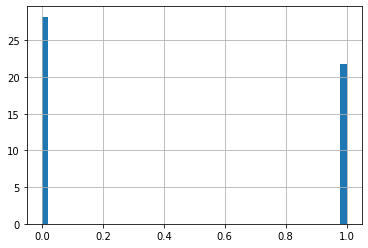

In [5]:

fig = plt.figure()
data['chocolate'].hist(bins=50,density=True)


So we can see that more products do not have chocolate and in order to get a cleare picture about their relative frequency we can calculate the frequencies . We have 2 binary classes for the chocolate feature and the variable is discreet so the problem can be seen as a classification problem and it is not really a regression problem. With 0 we denote the products with no chocolate and with 1 the products that have chocolate .

In [6]:
print('Counts :\n' ,data['chocolate'].value_counts(),)
print('\n')
print( 'Precentage :\n' ,data['chocolate'].value_counts() * 100 / len(data['chocolate'] ) )

Counts :
 0    48
1    37
Name: chocolate, dtype: int64


Precentage :
 0    56.470588
1    43.529412
Name: chocolate, dtype: float64


On the other hand the difference between the frequencies is not huge so we can not say that one class dominates 

## Categorical variables 
<ul><li>We will explore the dataset now and detect all the categorical variables, variables that have usually strings as values </li></ul>

In [7]:
# first indentify the list of features 
#features = [x for x in data.columns]
#features

In [8]:
# check if dtype = 'Object' , that means they are categorical 
cat_vars = [ var for var in data.columns if data[var].dtype == 'O' ]
len(cat_vars)

0

We do not have any categorical variables so we do not need any additional transformation for those kind of variables 


## Numerical Variables
<ul><li> Next we find the numerical variables </li></ul>

In [9]:
num_vars = [ var for var in data.columns if data not in cat_vars ]
print(num_vars)
print(len(num_vars))

['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']
12


## Missing Values 
Next we are going to search for missing values in any of our columns


In [10]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0 ] 
len(vars_with_na)

0

We can see that we have 0 missing values so we don't need any additional steps for those kind of variables 

## Temporal Variables 
Next we search for the temporal variables in the dataset 


In [11]:
data.head(1)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.86,66.971725


There is no temporal variable in the dataset so we can skip this step 

## Discreet Variables 
Let's now try to find the discreet variables in our dataset 


In [12]:
discreet_vars = [ var for var in num_vars if len(data[var].unique()) < 10   ]
discreet_vars

['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus']

Obviously we see that the 0/1 valued variables are all discreet ( binary to be more accurate ) and the continuous variables are those from the numerical that are percentages . 

In [13]:
cont_vars = [var for var in num_vars if var not in discreet_vars]
cont_vars 

['sugarpercent', 'pricepercent', 'winpercent']

In [14]:
# plot the different discreet variables w.r.t the 'chocolate' class 
# we drop chocolate from the plotted columns 
#for var in discreet_vars[1:]:
#    fig=plt.figure()



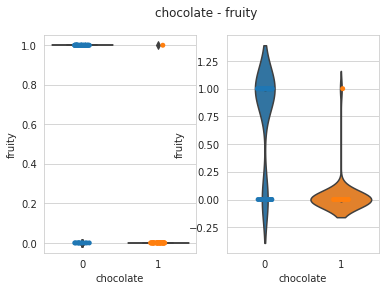

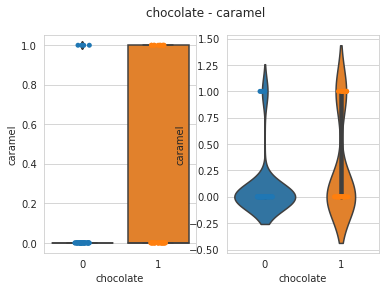

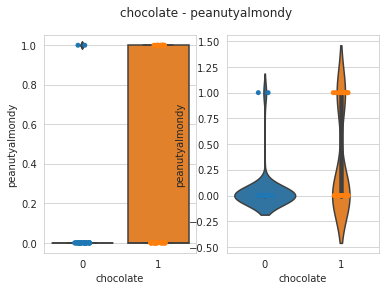

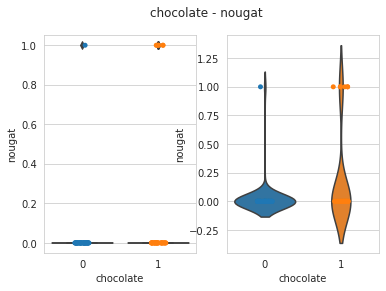

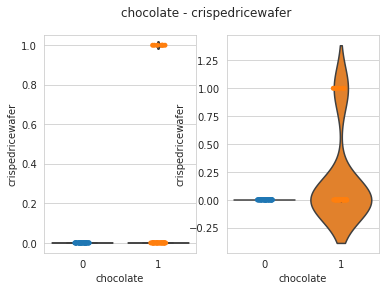

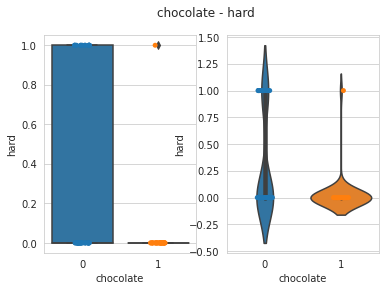

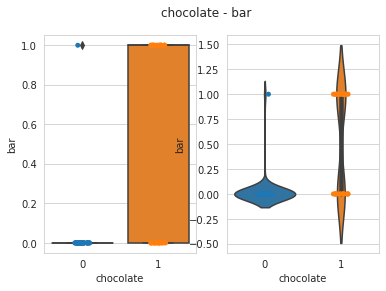

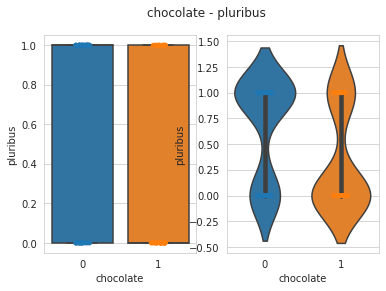

In [19]:
#  function to plot the distributions for each feature w.r.t the chocolate feature 
def plotPairs(data,feature1,feature2):
    figure, axes = plt.subplots(1,2)
    figure.suptitle(f"{feature1} - {feature2}")
    sns.set_style('whitegrid')
    sns.boxplot(x=feature1,y=feature2,ax=axes[0],data=data)
    sns.stripplot(x=feature1,y=feature2,ax=axes[0],data=data)
    sns.set_style('whitegrid')
    sns.violinplot(x=feature1,y=feature2,ax=axes[1],data=data)
    sns.stripplot(x=feature1,y=feature2,ax=axes[1],data=data)

# excude chocolate 
for var in discreet_vars[1:]:
    plotPairs(data,'chocolate',var)

To be able to draw some clear conclusions on the pairwise relations between chocolate and other features we can group for each binary value for each feature the number of observations that have chocolate.

In [16]:
data['chocolate'].value_counts()

0    48
1    37
Name: chocolate, dtype: int64

In [17]:
# count for each feature the different feature values-observations 
print(data.groupby('bar').sum())
print(data.groupby('fruity').sum())
print(data.groupby('hard').sum())
print(data.groupby('nougat').sum())

     chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
bar                                                                         
0           17      38        6               7       0                 1   
1           20       0        8               7       7                 6   

     hard  pluribus  sugarpercent  pricepercent   winpercent  
bar                                                           
0      15        44        29.603        24.610  2989.721259  
1       0         0        11.082        15.245  1287.203665  
        chocolate  caramel  peanutyalmondy  nougat  crispedricewafer  hard  \
fruity                                                                       
0              36       13              14       7                 7     2   
1               1        1               0       0                 0    13   

        bar  pluribus  sugarpercent  pricepercent   winpercent  
fruity                                                       

<u>From the above we can see for example that for the 'bar' feature 17 chocolate products (from the total chocolate products) are not 'bar' products but the other '20' chocolate products are 'bar' products .</u>

# Continuous Variables 
We can also plot the distributions of the continuous variables w.r.t chocolate 

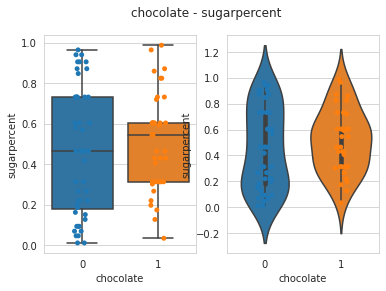

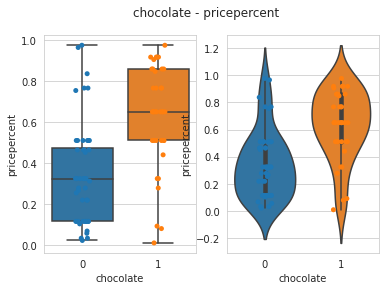

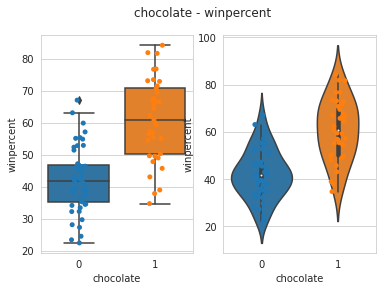

In [20]:
for var in cont_vars:
    plotPairs(data,'chocolate',var)
    

From the plots we can see that :
1. sugarpercent : <ul>
                  <li>50% the observations' sugarpercent  around the mean, lie in the 0.3-0.5 interval for the chocolate products </li>
                  <li>for the non chocolate products sugarpercent is more spread 0.2-0.7 </li>
                  </ul>
2. pricepercent : <ul>
                  <li>50% of the observations' pricepercent lie in the 0.5-0.9 interval for the chocolate products </li>
                  <li>for the non chocolate products pricepercent lies in the region 0.1-0.5 </li>
                  </ul>
3. winpercent :  <ul>
                  <li>50%of the observations' winpercent lies in the 50-70 interval for the chocolate products </li>
                  <li>for the non chocolate products winpercent lies in the region 34-45 </li>
                  </ul>

<u><strong>It is more clear now that chocolate products are related to a higher pricepercentage and a higher winpercentage So this could prove useful when designing the Model. It also seems that chocolate products tend to have more similar sugarpercent than non-chocolate products whose sugar values vary a lot more. </strong></u>

Let's now plot the distributions of the continuous variables

array([[<AxesSubplot:title={'center':'sugarpercent'}>,
        <AxesSubplot:title={'center':'pricepercent'}>],
       [<AxesSubplot:title={'center':'winpercent'}>, <AxesSubplot:>]],
      dtype=object)

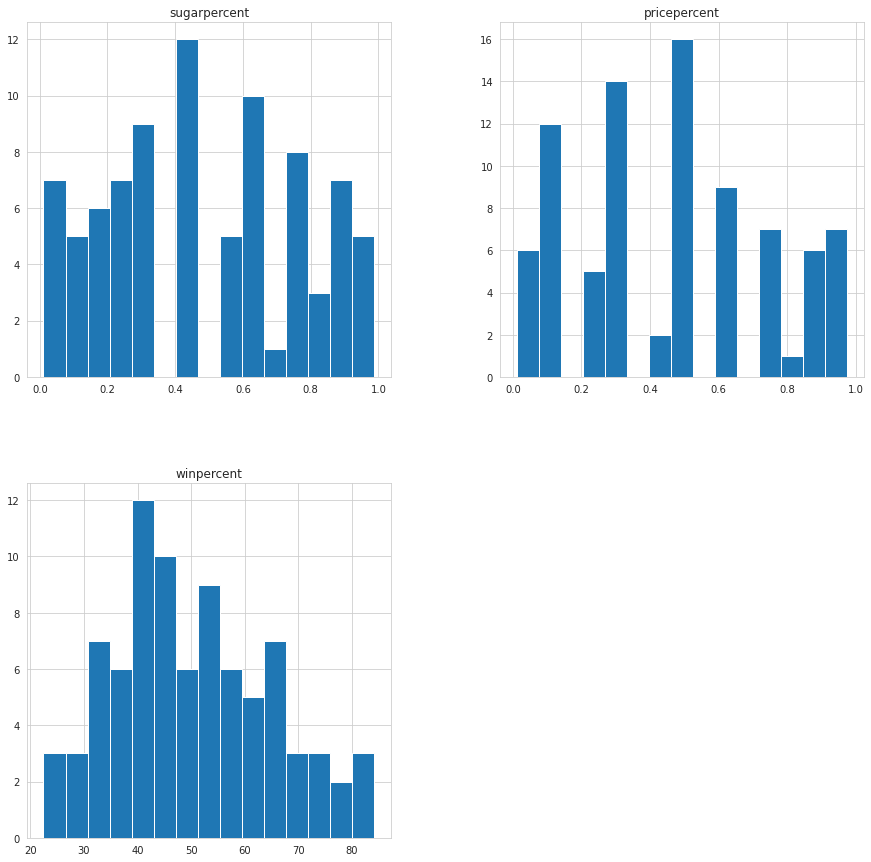

In [24]:
data[cont_vars].hist(bins=15,figsize=(15,15))

By observing the distributions, we can't see any clear gaussian distribution resemblance except maybe the winpercent feature

Text(0.5, 1.0, 'Transformed winpercent')

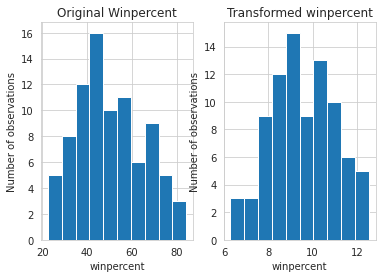

In [39]:
tmp_data = data.copy()
tmp_data['winpercent'],_ = stats.boxcox(np.array(data['winpercent']))

fig,axes = plt.subplots(1,2)
axes[0].set_title('Original Winpercent') 
axes[0].hist(data['winpercent'])
axes[0].set_xlabel('winpercent') 
axes[0].set_ylabel('Number of observations') 
  

axes[1].hist(tmp_data['winpercent'])
axes[1].set_xlabel('winpercent') 
axes[1].set_ylabel('Number of observations') 
axes[1].set_title('Transformed winpercent') 



Constrasting the oriiginal "winpercent" distribution with the transformed distribution it does not seem that the transformation improves the shape of the distribution so we will keep the original "winpercent" distribution. Also the transformation has swapped some values in our observations.